In [1]:
import pandas as pd

import numpy as np

import altair as alt

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans



pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)



# Read the CSV file into a DataFrame

df = pd.read_csv('C:/Users/neera/Downloads/Womens Clothing E-Commerce Reviews.csv/Womens Clothing E-Commerce Reviews.csv')



# Drop rows with nulls in specified columns

df.dropna(subset=['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name'], inplace=True)



# Drop unnecessary columns

df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Recommended IND'], inplace=True)



# Select numerical features

numerical_features = df[['Age', 'Rating', 'Positive Feedback Count']]



# Standardize numerical features

scaler = StandardScaler()

scaled_features = scaler.fit_transform(numerical_features)



# Select categorical features

categorical_features = df[['Division Name', 'Department Name', 'Class Name']]



# One-hot encode categorical features

encoder = OneHotEncoder()

encoded_features = encoder.fit_transform(categorical_features).toarray()



# Combine features

X = np.concatenate((scaled_features, encoded_features), axis=1)



# Elbow method to find optimal k

inertia = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i, random_state=42)

    kmeans.fit(X)

    inertia.append(kmeans.inertia_)



# Plot the elbow curve

elbow_data = pd.DataFrame({'Number of Clusters': range(1, 11), 'Inertia': inertia})

chart = alt.Chart(elbow_data).mark_line(point=True).encode(

    x='Number of Clusters',

    y='Inertia',

    tooltip = ['Number of Clusters', 'Inertia']

).properties(

    title='Elbow Method for Optimal k'

).interactive()



chart.save('elbow_curve_plot.json')



# Remove the redundant loop

# Apply KMeans clustering with the optimal number of clusters (4)

kmeans = KMeans(n_clusters=4, random_state=42)

cluster_labels = kmeans.fit_predict(X)



# Add cluster labels to the DataFrame

df_clustered = df.copy()

df_clustered['Cluster'] = cluster_labels



# Calculate mean for numerical columns by cluster

cluster_means = df_clustered.groupby('Cluster')[['Age', 'Rating', 'Positive Feedback Count']].mean().round(2)



# Calculate mode for categorical columns by cluster

cluster_modes = df_clustered.groupby('Cluster')[['Division Name', 'Department Name', 'Class Name']].agg(lambda x: pd.Series.mode(x)[0])



# Print cluster means

print("Cluster Means:\n", cluster_means.to_markdown(numalign="left", stralign="left"))



# Print cluster modes

print("\nCluster Modes:\n", cluster_modes.to_markdown(numalign="left", stralign="left"))

SyntaxError: invalid non-printable character U+00A0 (1568737080.py, line 77)

In [2]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/neera/Downloads/Womens Clothing E-Commerce Reviews.csv/Womens Clothing E-Commerce Reviews.csv')

# Drop rows with nulls in specified columns
df.dropna(subset=['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Recommended IND'], inplace=True)

# Select numerical features
numerical_features = df[['Age', 'Rating', 'Positive Feedback Count']]

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Select categorical features
categorical_features = df[['Division Name', 'Department Name', 'Class Name']]

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical_features).toarray()

# Combine features
X = np.concatenate((scaled_features, encoded_features), axis=1)

# Elbow method to find optimal k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
elbow_data = pd.DataFrame({'Number of Clusters': range(1, 11), 'Inertia': inertia})
chart = alt.Chart(elbow_data).mark_line(point=True).encode(
    x='Number of Clusters',
    y='Inertia',
    tooltip=['Number of Clusters', 'Inertia']
).properties(
    title='Elbow Method for Optimal k'
).interactive()

chart.save('elbow_curve_plot.json')

# Apply KMeans clustering with the optimal number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Calculate mean for numerical columns by cluster
cluster_means = df_clustered.groupby('Cluster')[['Age', 'Rating', 'Positive Feedback Count']].mean().round(2)

# Calculate mode for categorical columns by cluster
cluster_modes = df_clustered.groupby('Cluster')[['Division Name', 'Department Name', 'Class Name']].agg(lambda x: pd.Series.mode(x)[0])

# Print cluster means
print("Cluster Means:\n", cluster_means.to_markdown(numalign="left", stralign="left"))

# Print cluster modes
print("\nCluster Modes:\n", cluster_modes.to_markdown(numalign="left", stralign="left"))


C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Cluster Means:
 | Cluster   | Age   | Rating   | Positive Feedback Count   |
|:----------|:------|:---------|:--------------------------|
| 0         | 57.06 | 4.64     | 1.92                      |
| 1         | 40.89 | 2.35     | 2.29                      |
| 2         | 35.52 | 4.71     | 1.61                      |
| 3         | 45.05 | 4.08     | 26.07                     |

Cluster Modes:
 | Cluster   | Division Name   | Department Name   | Class Name   |
|:----------|:----------------|:------------------|:-------------|
| 0         | General         | Tops              | Knits        |
| 1         | General         | Tops              | Dresses      |
| 2         | General         | Tops              | Dresses      |
| 3         | General         | Tops              | Dresses      |


C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


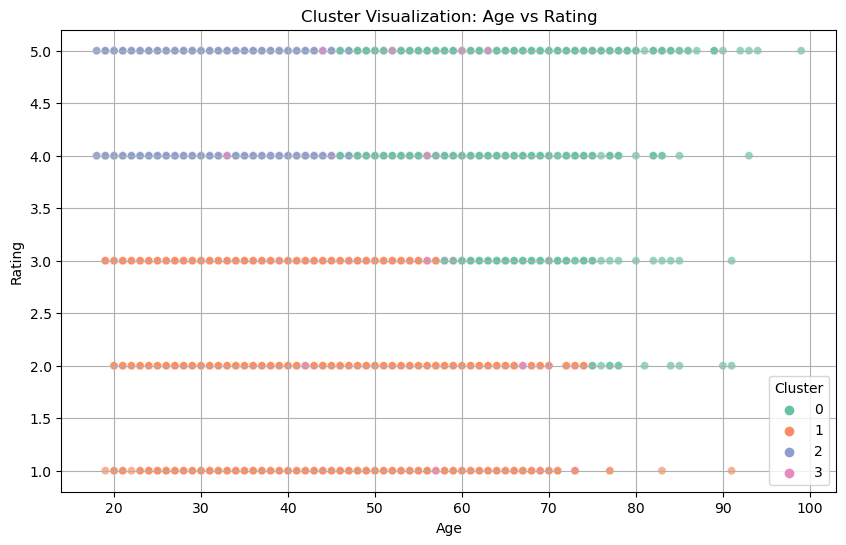

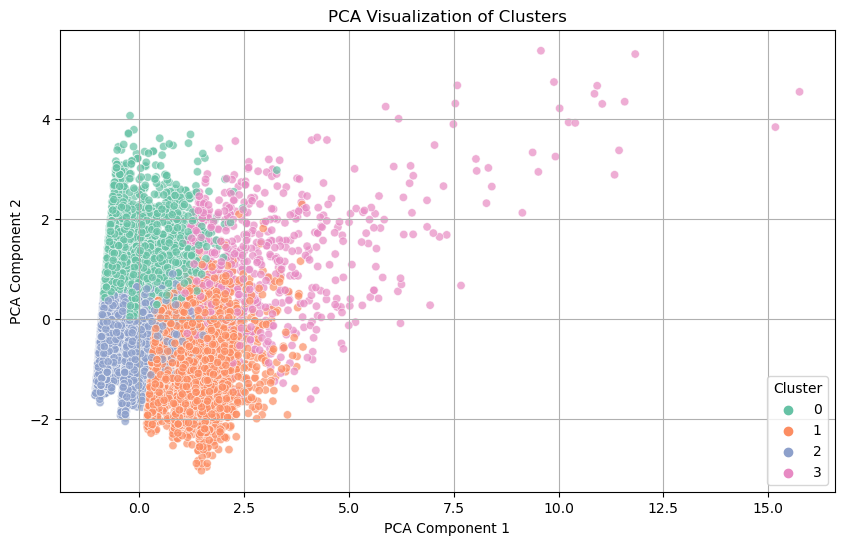

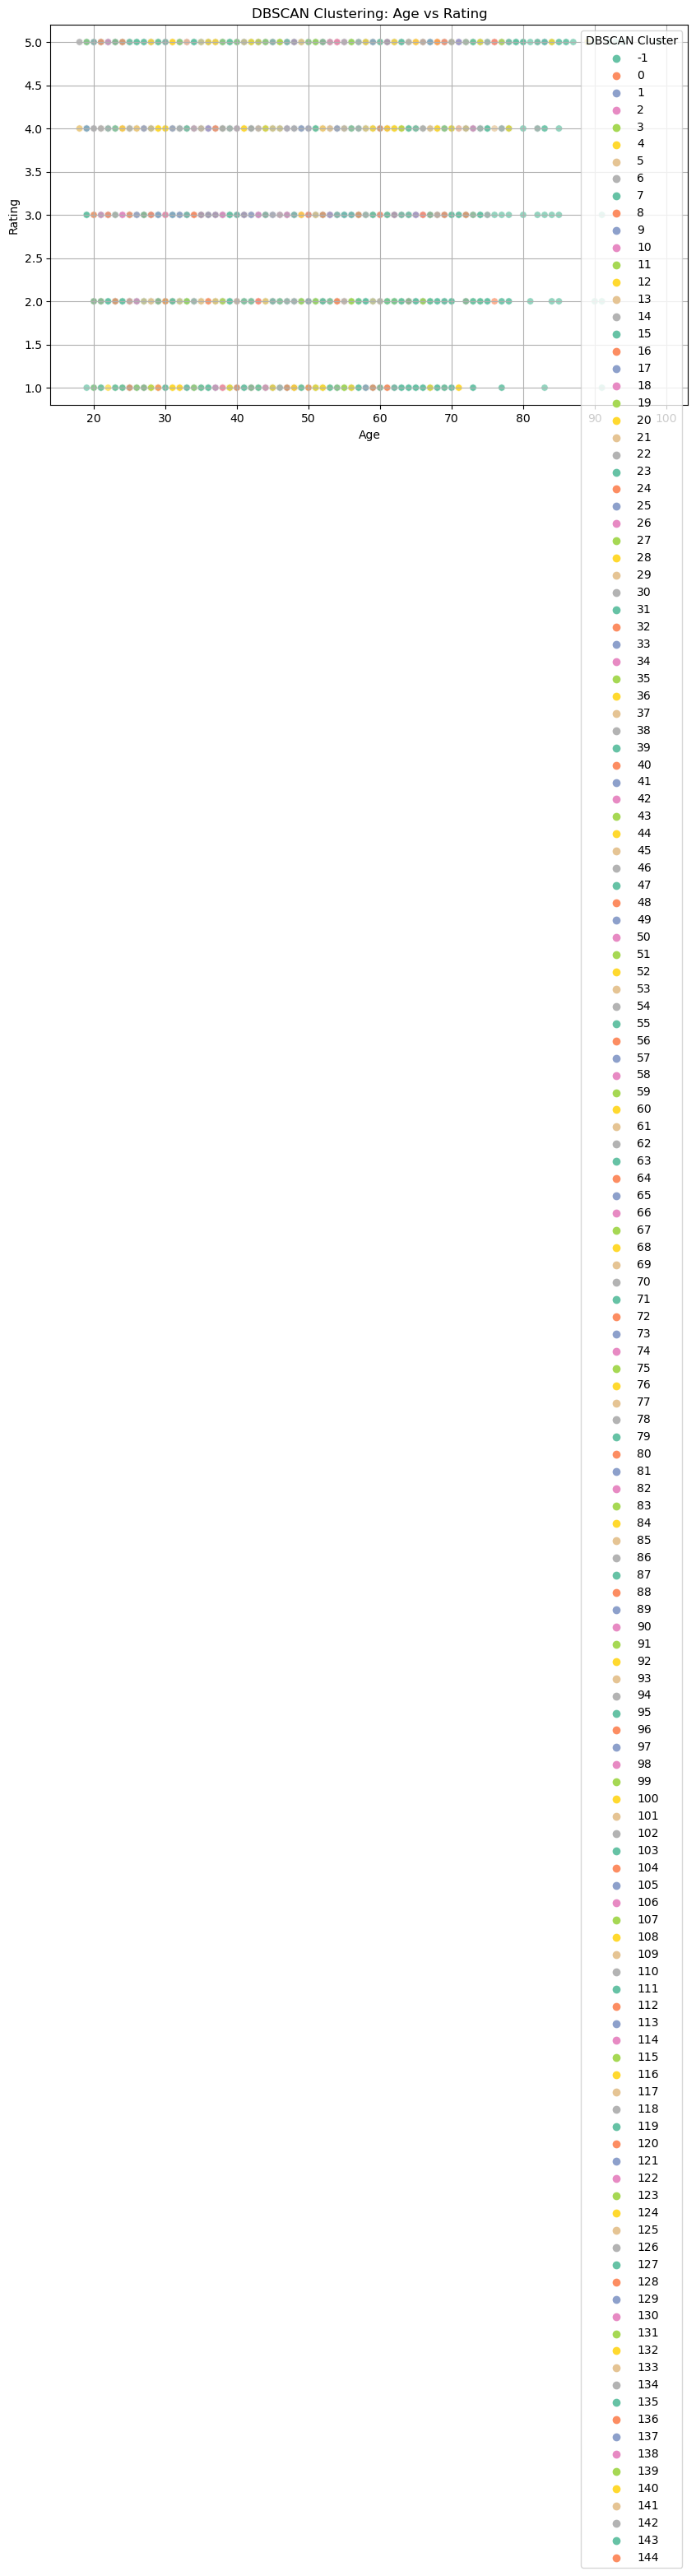

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

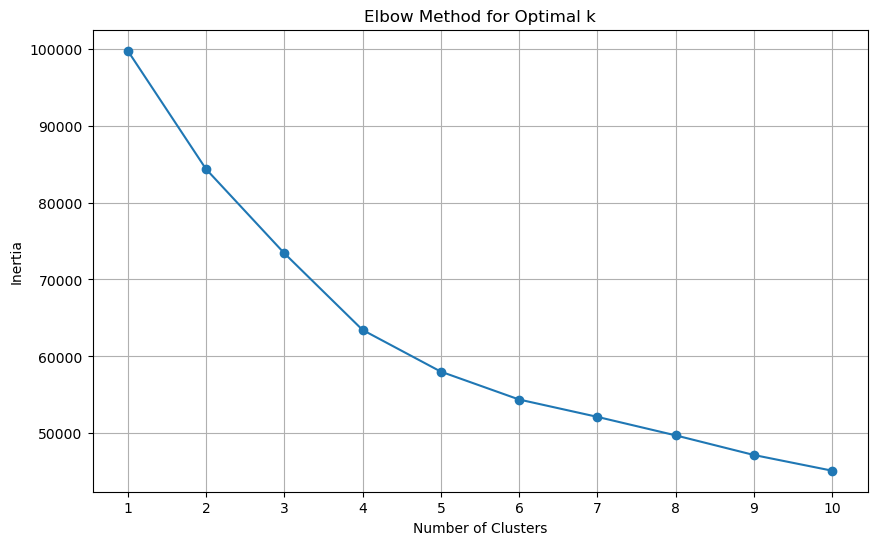

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/neera/Downloads/Womens Clothing E-Commerce Reviews.csv/Womens Clothing E-Commerce Reviews.csv')

# Drop rows with nulls in specified columns
df.dropna(subset=['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Recommended IND'], inplace=True)

# Select numerical features
numerical_features = df[['Age', 'Rating', 'Positive Feedback Count']]

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Select categorical features
categorical_features = df[['Division Name', 'Department Name', 'Class Name']]

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical_features).toarray()

# Combine features
X = np.concatenate((scaled_features, encoded_features), axis=1)

# Apply KMeans clustering with the optimal number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame for visualization
df['Cluster'] = cluster_labels

# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Rating', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('Cluster Visualization: Age vs Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_reduced, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Add DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Rating', hue='DBSCAN_Cluster', palette='Set2', alpha=0.7)
plt.title('DBSCAN Clustering: Age vs Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend(title='DBSCAN Cluster')
plt.grid()
plt.show()

# Elbow method to find optimal k
inertia = []
k_values = range(1, 11)

for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
